In [1]:
# Please see this page for the original dataset information 
# https://www.kaggle.com/moltean/fruits?select=fruits-360

from keras.preprocessing.image import ImageDataGenerator

path = "C:/Users/Wash/PycharmProjects/TensorflowPractice/datasets/fruits-360"

Using TensorFlow backend.


In [16]:
import os

BATCH_SIZE = 32
EPOCHS = 20
TARGET_SIZE = (100, 100)

# Let's see how the model performs without any modification to the original images
train_datagen = ImageDataGenerator(
    validation_split=0.2
)
#     rescale=1./255,
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    os.path.join(path, "Training"),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(path, "Training"),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(path, "Test"),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE
)

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [31]:
# First, we'll perform it on basic dense layers before going into CNN layers
# to set a baseline for our model

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

In [41]:
def base_model():
    model = Sequential()
    model.add(Flatten(input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(131, activation="softmax"))

    model.compile(optimizer=SGD(),
                  loss="categorical_crossentropy",
                  metrics=["acc"])
    
    return model

In [43]:
# Taken from https://stackoverflow.com/a/53097946
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 90
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr


CALLBACKS = [
    LearningRateScheduler(lr_scheduler)
]

In [36]:
model = base_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1920064   
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 131)               16899     
Total params: 1,945,283
Trainable params: 1,945,283
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(train_generator,
          steps_per_epoch=train_generator.samples // BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/20
1693/1693 [==============================] - 35s 21ms/step - loss: 43544111.9414 - acc: 0.0140 - val_loss: 4.8765 - val_acc: 0.0145
Epoch 2/20
1693/1693 [==============================] - 34s 20ms/step - loss: 4.8684 - acc: 0.0146 - val_loss: 4.8603 - val_acc: 0.0146
Epoch 3/20
1693/1693 [==============================] - 33s 20ms/step - loss: 4.8651 - acc: 0.0146 - val_loss: 4.8754 - val_acc: 0.0145
Epoch 4/20
1693/1693 [==============================] - 34s 20ms/step - loss: 4.8627 - acc: 0.0145 - val_loss: 4.8849 - val_acc: 0.0144
Epoch 5/20
1693/1693 [==============================] - 33s 19ms/step - loss: 4.8608 - acc: 0.0146 - val_loss: 4.8807 - val_acc: 0.0146
Epoch 6/20
1693/1693 [==============================] - 32s 19ms/step - loss: 4.8594 - acc: 0.0146 - val_loss: 4.8815 - val_acc: 0.0145
Epoch 7/20
1693/1693 [==============================] - 33s 19ms/step - loss: 4.8585 - acc: 0.0146 - val_loss: 4.8987 - val_acc: 0.0147
Epoch 8/20
1693/1693 [===================

KeyboardInterrupt: 

In [37]:
# Changed EPOCHS because it took a while to run
BATCH_SIZE = 32
EPOCHS = 10
TARGET_SIZE = (100, 100)

# As can be seen, it wasn't performing well
# Lets try the same thing but with rescaled images
train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(path, "Training"),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(path, "Training"),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(path, "Test"),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE
)

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [44]:
# Same model
model = base_model()
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // BATCH_SIZE,
                    callbacks=CALLBACKS)

Epoch 1/10
1693/1693 [==============================] - 33s 20ms/step - loss: 3.7577 - acc: 0.1321 - val_loss: 3.0020 - val_acc: 0.2530
Epoch 2/10
1693/1693 [==============================] - 34s 20ms/step - loss: 1.9391 - acc: 0.4097 - val_loss: 1.2163 - val_acc: 0.6115
Epoch 3/10
1693/1693 [==============================] - 36s 21ms/step - loss: 1.0513 - acc: 0.6712 - val_loss: 0.7412 - val_acc: 0.7445
Epoch 4/10
1693/1693 [==============================] - 34s 20ms/step - loss: 0.6784 - acc: 0.7877 - val_loss: 0.6796 - val_acc: 0.7785
Epoch 5/10
1693/1693 [==============================] - 35s 21ms/step - loss: 0.5267 - acc: 0.8454 - val_loss: 1.1332 - val_acc: 0.8187
Epoch 6/10
1693/1693 [==============================] - 33s 20ms/step - loss: 0.3834 - acc: 0.8860 - val_loss: 0.5795 - val_acc: 0.8595
Epoch 7/10
1693/1693 [==============================] - 33s 20ms/step - loss: 0.2862 - acc: 0.9185 - val_loss: 0.6518 - val_acc: 0.8800
Epoch 8/10
1693/1693 [==========================

In [46]:
import matplotlib.pyplot as plt

def plot_history(history, epochs, metrics):
    for fignum, metric in enumerate(metrics):
        train = history.history[metric]
        val = history.history[f"val_{metric}"]

        plt.figure(fignum)
        plt.plot(range(1, epochs+1), train, label=f"Training {metric}")
        plt.plot(range(1, epochs+1), val, label=f"Validation {metric}")
        plt.legend()
        plt.title(f"Training {metric} vs Validation {metric}")

    plt.show()

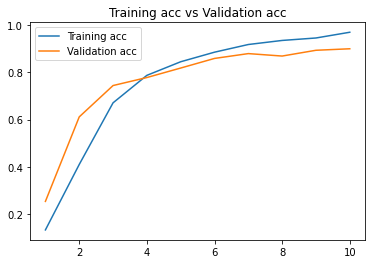

In [48]:
plot_history(history, EPOCHS, ["acc"])

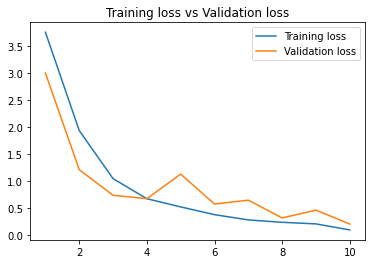

In [49]:
plot_history(history, EPOCHS, ["loss"])

In [50]:
# That was much better just by rescaling the image
# And it seems like it is capable of achieving ~90% accuracy on validation
# set within 10 epochs
# Lets see how it performs on the test set
model.evaluate(test_generator)

709/709 [==============================] - 13s 18ms/step


[0.43875595927238464, 0.8664051294326782]

In [64]:
# 86% accuracy is not bad for 10 epochs and using normal dense layers
# Let us now use CNNs and see if we can improve on this
from keras.layers import Conv2D, Dropout, MaxPooling2D

# 2 models here
# 1 with dropout to see if it improves generalization
def CNN_model():
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3), activation="relu"))
    model.add(Conv2D(32, 3, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(131, activation="softmax"))
    
    model.compile(optimizer=SGD(),
                  loss="categorical_crossentropy",
                  metrics=["acc"])
    
    return model


def CNN_dropout_model():
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3), activation="relu"))
    model.add(Conv2D(32, 3, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Dropout(.3))
    model.add(Flatten())
    model.add(Dense(131, activation="softmax"))
    
    model.compile(optimizer=SGD(),
                  loss="categorical_crossentropy",
                  metrics=["acc"])
    
    return model

In [65]:
cnn_model = CNN_model()
cnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 73728)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 131)               9658499   
Total params: 9,663,587
Trainable params: 9,663,587
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = cnn_model.fit(train_generator,
                        steps_per_epoch=train_generator.samples // BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=validation_generator,
                        validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/10
1693/1693 [==============================] - 40s 24ms/step - loss: 1.0601 - acc: 0.7548 - val_loss: 0.4118 - val_acc: 0.905319 - acc: 0.754
Epoch 2/10
1693/1693 [==============================] - 39s 23ms/step - loss: 0.0387 - acc: 0.9929 - val_loss: 0.6448 - val_acc: 0.9059
Epoch 3/10
1693/1693 [==============================] - 39s 23ms/step - loss: 0.0285 - acc: 0.9971 - val_loss: 0.2411 - val_acc: 0.9139
Epoch 4/10
1693/1693 [==============================] - 39s 23ms/step - loss: 0.0052 - acc: 0.9995 - val_loss: 0.2580 - val_acc: 0.9160
Epoch 5/10
1693/1693 [==============================] - 39s 23ms/step - loss: 0.0026 - acc: 0.9998 - val_loss: 0.2903 - val_acc: 0.9198
Epoch 6/10
1693/1693 [==============================] - 39s 23ms/step - loss: 0.0022 - acc: 0.9997 - val_loss: 0.0699 - val_acc: 0.9214
Epoch 7/10
1693/1693 [==============================] - 39s 23ms/step - loss: 9.9468e-04 - acc: 0.9999 - val_loss: 0.9359 - val_acc: 0.9250
Epoch 8/10
1693/1693 [=======

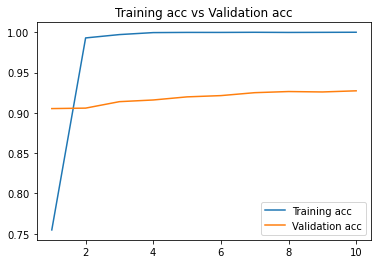

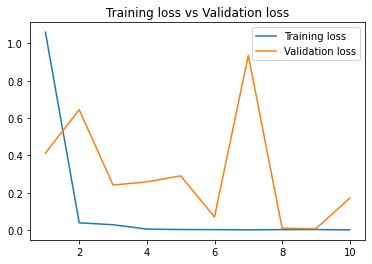

In [67]:
# Training accuracy was 100% while validation accuracy plateaued  at around 92%
# Which is still a pretty significant improvement
plot_history(history, EPOCHS, ["acc", "loss"])

In [68]:
cnn_model.evaluate(test_generator)

709/709 [==============================] - 11s 15ms/step


[0.5413880944252014, 0.9231311678886414]

In [70]:
# Lets see if dropout will help with generatlization
cnn_dropout_model = CNN_dropout_model()
history = cnn_dropout_model.fit(train_generator,
                                steps_per_epoch=train_generator.samples // BATCH_SIZE,
                                epochs=EPOCHS,
                                validation_data=validation_generator,
                                validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/10
1693/1693 [==============================] - 44s 26ms/step - loss: 1.0578 - acc: 0.7499 - val_loss: 0.1512 - val_acc: 0.9039
Epoch 2/10
1693/1693 [==============================] - 44s 26ms/step - loss: 0.0411 - acc: 0.9925 - val_loss: 0.8405 - val_acc: 0.9327
Epoch 3/10
1693/1693 [==============================] - 43s 25ms/step - loss: 0.0098 - acc: 0.9980 - val_loss: 0.3129 - val_acc: 0.9251
Epoch 4/10
1693/1693 [==============================] - 43s 25ms/step - loss: 0.0045 - acc: 0.9993 - val_loss: 0.2476 - val_acc: 0.9380
Epoch 5/10
1693/1693 [==============================] - 43s 25ms/step - loss: 0.0067 - acc: 0.9993 - val_loss: 0.3223 - val_acc: 0.9512
Epoch 6/10
1693/1693 [==============================] - 43s 25ms/step - loss: 0.0068 - acc: 0.9989 - val_loss: 0.6432 - val_acc: 0.9432
Epoch 7/10
1693/1693 [==============================] - 45s 26ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1072 - val_acc: 0.9487
Epoch 8/10
1693/1693 [==========================

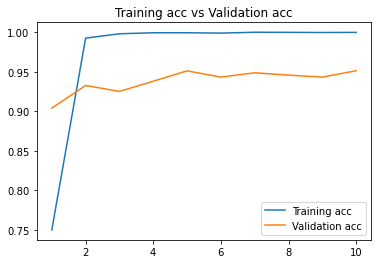

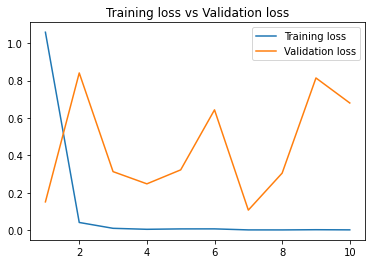

In [71]:
# Validation accuracy went up by about 2~3 % which is what we've hoped for 
plot_history(history, EPOCHS, ["acc", "loss"])

In [72]:
# 94% test accuracy rather than 92% from the previous model
cnn_dropout_model.evaluate(test_generator)

709/709 [==============================] - 11s 16ms/step


[0.5475668907165527, 0.9402326941490173]

In [73]:
# Lets try the same dropout model but with rmsprop optimizer this time instead of SGD
def CNN_dropout_model_rmsprop():
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3), activation="relu"))
    model.add(Conv2D(32, 3, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Dropout(.3))
    model.add(Flatten())
    model.add(Dense(131, activation="softmax"))
    
    model.compile(optimizer="rmsprop",
                  loss="categorical_crossentropy",
                  metrics=["acc"])
    
    return model

In [74]:
cnn_dropout_model_rmsprop = CNN_dropout_model_rmsprop()
history = cnn_dropout_model_rmsprop.fit(train_generator,
                                        steps_per_epoch=train_generator.samples // BATCH_SIZE,
                                        epochs=EPOCHS,
                                        validation_data=validation_generator,
                                        validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/10
1693/1693 [==============================] - 50s 30ms/step - loss: 0.2737 - acc: 0.9403 - val_loss: 1.0160 - val_acc: 0.9212
Epoch 2/10
1693/1693 [==============================] - 49s 29ms/step - loss: 0.0112 - acc: 0.9976 - val_loss: 0.5801 - val_acc: 0.9291
Epoch 3/10
1693/1693 [==============================] - 50s 29ms/step - loss: 0.0067 - acc: 0.9990 - val_loss: 0.9037 - val_acc: 0.9265
Epoch 4/10
1693/1693 [==============================] - 46s 27ms/step - loss: 0.0040 - acc: 0.9993 - val_loss: 0.0420 - val_acc: 0.9310
Epoch 5/10
1693/1693 [==============================] - 46s 27ms/step - loss: 0.0029 - acc: 0.9996 - val_loss: 0.4477 - val_acc: 0.9333
Epoch 6/10
1693/1693 [==============================] - 46s 27ms/step - loss: 0.0026 - acc: 0.9997 - val_loss: 0.2631 - val_acc: 0.9191
Epoch 7/10
1693/1693 [==============================] - 47s 28ms/step - loss: 0.0023 - acc: 0.9997 - val_loss: 2.0665 - val_acc: 0.9157
Epoch 8/10
1693/1693 [==========================

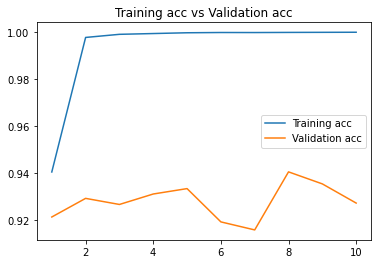

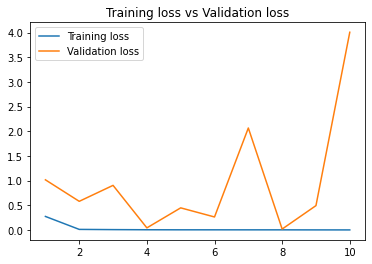

In [75]:
plot_history(history, EPOCHS, ["acc", "loss"])

In [76]:
cnn_dropout_model_rmsprop.evaluate(test_generator)

709/709 [==============================] - 11s 16ms/step


[2.9743432998657227, 0.9172249436378479]

In [77]:
def paper_CNN():
    model = Sequential()
    model.add(Conv2D(16, 5, input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3), activation="relu"))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, 5, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 5, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, 5, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(131, activation="softmax"))
    
    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["acc"])
    
    return model

In [78]:
paper_cnn = paper_CNN()

In [79]:
paper_cnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 5, 128)       

In [80]:
history = paper_cnn.fit(train_generator,
                        steps_per_epoch=train_generator.samples // BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=validation_generator,
                        validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/10
1693/1693 [==============================] - 40s 23ms/step - loss: 0.8054 - acc: 0.7873 - val_loss: 0.5134 - val_acc: 0.8408
Epoch 2/10
1693/1693 [==============================] - 34s 20ms/step - loss: 0.0994 - acc: 0.9716 - val_loss: 0.3515 - val_acc: 0.9044
Epoch 3/10
1693/1693 [==============================] - 33s 20ms/step - loss: 0.0724 - acc: 0.9800 - val_loss: 0.8991 - val_acc: 0.8857
Epoch 4/10
1693/1693 [==============================] - 34s 20ms/step - loss: 0.0670 - acc: 0.9819 - val_loss: 1.1665 - val_acc: 0.8783
Epoch 5/10
1693/1693 [==============================] - 34s 20ms/step - loss: 0.0572 - acc: 0.9847 - val_loss: 0.2467 - val_acc: 0.8837
Epoch 6/10
1693/1693 [==============================] - 34s 20ms/step - loss: 0.0470 - acc: 0.9881 - val_loss: 0.2786 - val_acc: 0.8825
Epoch 7/10
1693/1693 [==============================] - 34s 20ms/step - loss: 0.0456 - acc: 0.9887 - val_loss: 0.9063 - val_acc: 0.8984
Epoch 8/10
1693/1693 [==========================

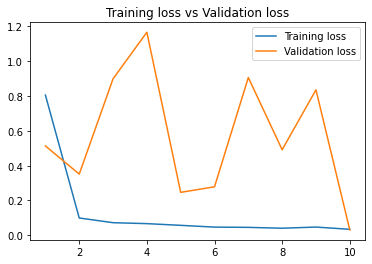

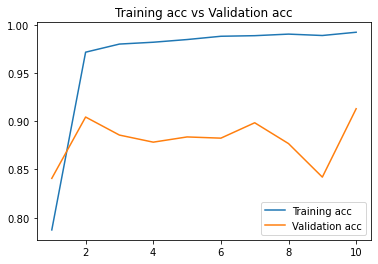

In [81]:
plot_history(history, EPOCHS, ["loss", "acc"])

In [82]:
paper_cnn.evaluate(test_generator)

709/709 [==============================] - 14s 19ms/step


[0.40288791060447693, 0.9208391904830933]

In [83]:
def paper_CNN_dropout():
    model = Sequential()
    model.add(Conv2D(16, 5, input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3), activation="relu"))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, 5, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 5, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, 5, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(131, activation="softmax"))
    
    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["acc"])
    
    return model

In [84]:
paper_cnn_dropout = paper_CNN_dropout()
history = paper_cnn_dropout.fit(train_generator,
                                steps_per_epoch=train_generator.samples // BATCH_SIZE,
                                epochs=EPOCHS,
                                validation_data=validation_generator,
                                validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/10
1693/1693 [==============================] - 35s 21ms/step - loss: 0.9669 - acc: 0.7388 - val_loss: 0.7259 - val_acc: 0.8544
Epoch 2/10
1693/1693 [==============================] - 37s 22ms/step - loss: 0.1259 - acc: 0.9602 - val_loss: 0.2432 - val_acc: 0.8953
Epoch 3/10
1693/1693 [==============================] - 35s 21ms/step - loss: 0.0983 - acc: 0.9703 - val_loss: 0.6928 - val_acc: 0.9180
Epoch 4/10
1693/1693 [==============================] - 35s 21ms/step - loss: 0.0749 - acc: 0.9785 - val_loss: 0.1535 - val_acc: 0.9186
Epoch 5/10
1693/1693 [==============================] - 33s 20ms/step - loss: 0.0697 - acc: 0.9813 - val_loss: 1.2168 - val_acc: 0.8782
Epoch 6/10
1693/1693 [==============================] - 33s 19ms/step - loss: 0.0634 - acc: 0.9831 - val_loss: 0.1892 - val_acc: 0.9071
Epoch 7/10
1693/1693 [==============================] - 33s 20ms/step - loss: 0.0582 - acc: 0.9853 - val_loss: 0.8210 - val_acc: 0.8919
Epoch 8/10
1693/1693 [==========================

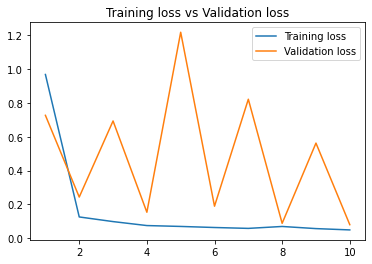

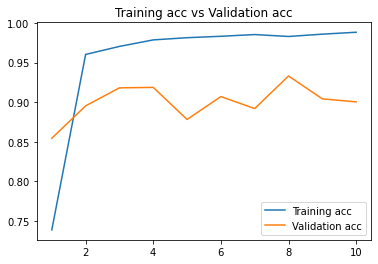

In [85]:
plot_history(history, EPOCHS, ["loss", "acc"])

In [86]:
paper_cnn_dropout.evaluate(test_generator)

709/709 [==============================] - 11s 16ms/step


[0.8005015850067139, 0.9095116257667542]